In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("logs.csv")

In [4]:
wr = sum(df['win']) / len(df) * 100
profit = df['profit'].sum()
print(f"Win Rate: {wr:.2f}%")
print(f"Profit: {profit:.2f}$")

Win Rate: 43.56%
Profit: -17.94$


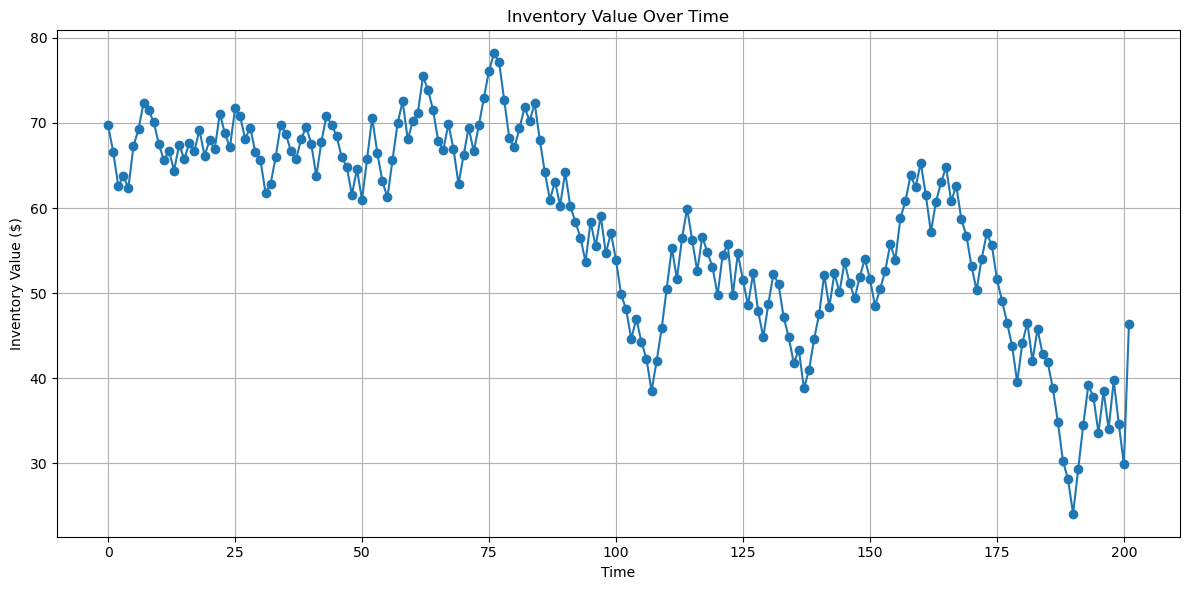

In [348]:
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(len(df["inventory_value"]))], df["inventory_value"], marker='o', linestyle='-')
plt.title("Inventory Value Over Time")
plt.xlabel("Time")
plt.ylabel("Inventory Value ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

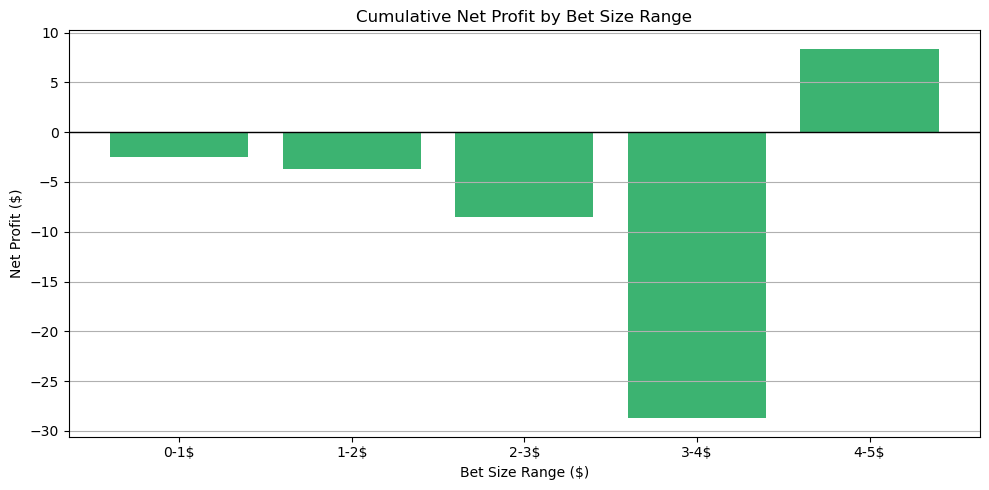

In [349]:
    # Compute profit per bet_bin
bins = np.arange(0, 6, 1)
labels = [f"{i}-{i+1}$" for i in bins[:-1]]

df["bet_bin"] = pd.cut(df["your_value"], bins=bins, labels=labels, right=False)
profit_by_bin = df.groupby("bet_bin")["profit"].sum()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(profit_by_bin.index, profit_by_bin.values, color="mediumseagreen")
plt.axhline(0, color='black', linewidth=1)
plt.title("Cumulative Net Profit by Bet Size Range")
plt.xlabel("Bet Size Range ($)")
plt.ylabel("Net Profit ($)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


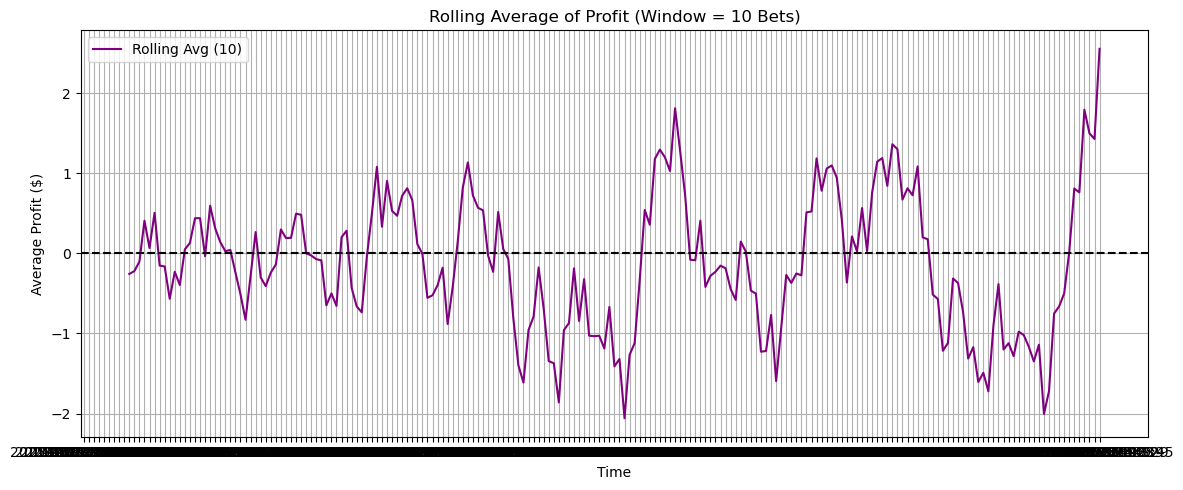

In [350]:
df["rolling_profit"] = df["profit"].rolling(window=10).mean()

plt.figure(figsize=(12, 5))
plt.plot(df["timestamp"], df["rolling_profit"], label="Rolling Avg (10)", color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Rolling Average of Profit (Window = 10 Bets)")
plt.xlabel("Time")
plt.ylabel("Average Profit ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()